# Drop out implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import SGD
from keras.utils import to_categorical
np.random.seed(1671)

/Users/tari/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
NB_EPOCH = 250
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10
OPTIMIZER = SGD()
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2
DROPOUT = 0.3

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
RESHAPED = 784

In [5]:
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [6]:
X_train /= 255
X_test /= 255

In [7]:
print(X_train.shape[0], ' training samples')
print(X_test.shape[0], ' testing samples')

60000  training samples
10000  testing samples


In [8]:
y_train = to_categorical(y_train, NB_CLASSES)
y_test = to_categorical(y_test, NB_CLASSES)

In [9]:
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape = (RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(rate=DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(rate=DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
__________

In [10]:
model.compile(optimizer=OPTIMIZER, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE,
                    epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/250
48000/48000 [==============================] - 4s 87us/step - loss: 1.7403 - acc: 0.4540 - val_loss: 0.9291 - val_acc: 0.8124
Epoch 2/250
48000/48000 [==============================] - 4s 78us/step - loss: 0.9231 - acc: 0.7230 - val_loss: 0.5399 - val_acc: 0.8654
Epoch 3/250
48000/48000 [==============================] - 3s 72us/step - loss: 0.6935 - acc: 0.7880 - val_loss: 0.4297 - val_acc: 0.8886
Epoch 4/250
48000/48000 [==============================] - 3s 68us/step - loss: 0.5947 - acc: 0.8209 - val_loss: 0.3790 - val_acc: 0.8977
Epoch 5/250
48000/48000 [==============================] - 3s 67us/step - loss: 0.5347 - acc: 0.8392 - val_loss: 0.3455 - val_acc: 0.9040
Epoch 6/250
48000/48000 [==============================] - 3s 68us/step - loss: 0.4976 - acc: 0.8523 - val_loss: 0.3232 - val_acc: 0.9107
Epoch 7/250
48000/48000 [==============================] - 3s 68us/step - loss: 0.4616 - acc: 0.8629 - val_loss: 0.3048 - 

/Users/tari/anaconda3/lib/python3.5/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100277). Check your callbacks.
  % delta_t_median)


48000/48000 [==============================] - 6s 128us/step - loss: 0.1502 - acc: 0.9552 - val_loss: 0.1086 - val_acc: 0.9677
Epoch 71/250
48000/48000 [==============================] - 5s 95us/step - loss: 0.1478 - acc: 0.9566 - val_loss: 0.1082 - val_acc: 0.9679
Epoch 72/250
48000/48000 [==============================] - 4s 91us/step - loss: 0.1450 - acc: 0.9566 - val_loss: 0.1073 - val_acc: 0.9686
Epoch 73/250
48000/48000 [==============================] - 4s 80us/step - loss: 0.1462 - acc: 0.9570 - val_loss: 0.1068 - val_acc: 0.9680
Epoch 74/250
48000/48000 [==============================] - 4s 79us/step - loss: 0.1440 - acc: 0.9582 - val_loss: 0.1068 - val_acc: 0.9681
Epoch 75/250
48000/48000 [==============================] - 4s 88us/step - loss: 0.1448 - acc: 0.9565 - val_loss: 0.1059 - val_acc: 0.9681
Epoch 76/250
48000/48000 [==============================] - 4s 86us/step - loss: 0.1414 - acc: 0.9580 - val_loss: 0.1060 - val_acc: 0.9686
Epoch 77/250
48000/48000 [=============

Epoch 129/250
48000/48000 [==============================] - 6s 123us/step - loss: 0.1051 - acc: 0.9676 - val_loss: 0.0883 - val_acc: 0.9754
Epoch 130/250
48000/48000 [==============================] - 5s 95us/step - loss: 0.1040 - acc: 0.9689 - val_loss: 0.0884 - val_acc: 0.9751
Epoch 131/250
48000/48000 [==============================] - 5s 102us/step - loss: 0.1026 - acc: 0.9689 - val_loss: 0.0876 - val_acc: 0.9751
Epoch 132/250
48000/48000 [==============================] - 7s 150us/step - loss: 0.0999 - acc: 0.9702 - val_loss: 0.0880 - val_acc: 0.9751
Epoch 133/250
48000/48000 [==============================] - 5s 100us/step - loss: 0.1009 - acc: 0.9688 - val_loss: 0.0877 - val_acc: 0.9753
Epoch 134/250
48000/48000 [==============================] - 5s 109us/step - loss: 0.0989 - acc: 0.9689 - val_loss: 0.0878 - val_acc: 0.9752
Epoch 135/250
48000/48000 [==============================] - 4s 82us/step - loss: 0.1008 - acc: 0.9692 - val_loss: 0.0880 - val_acc: 0.9749
Epoch 136/250
4

48000/48000 [==============================] - 3s 73us/step - loss: 0.0635 - acc: 0.9804 - val_loss: 0.0799 - val_acc: 0.9776
Epoch 246/250
48000/48000 [==============================] - 3s 69us/step - loss: 0.0629 - acc: 0.9803 - val_loss: 0.0811 - val_acc: 0.9770
Epoch 247/250
48000/48000 [==============================] - 3s 70us/step - loss: 0.0621 - acc: 0.9802 - val_loss: 0.0802 - val_acc: 0.9777
Epoch 248/250
48000/48000 [==============================] - 3s 69us/step - loss: 0.0632 - acc: 0.9804 - val_loss: 0.0803 - val_acc: 0.9771
Epoch 249/250
48000/48000 [==============================] - 4s 83us/step - loss: 0.0635 - acc: 0.9800 - val_loss: 0.0805 - val_acc: 0.9777
Epoch 250/250
48000/48000 [==============================] - 4s 84us/step - loss: 0.0617 - acc: 0.9807 - val_loss: 0.0803 - val_acc: 0.9777


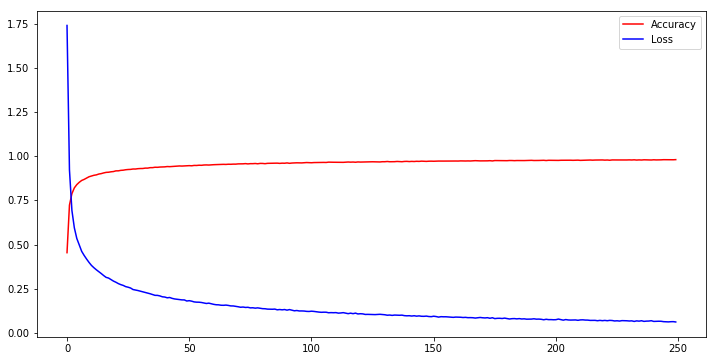

In [11]:
plt.figure(figsize=(12,6))
plt.plot(history.history['acc'], color = 'red', label = 'Accuracy' )
plt.plot(history.history['loss'], color = 'blue', label = 'Loss')
plt.legend()

In [12]:
score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print('Test score {}'.format(score[0]))
print('Test accuracy {}'.format(score[1]))

10000/10000 [==============================] - 1s 64us/step
Test score 0.07753440993961412
Test accuracy 0.978


## Ploting Loss and Accuracy for train and test

In [16]:
history.history.keys()

dict_keys(['val_acc', 'val_loss', 'acc', 'loss'])

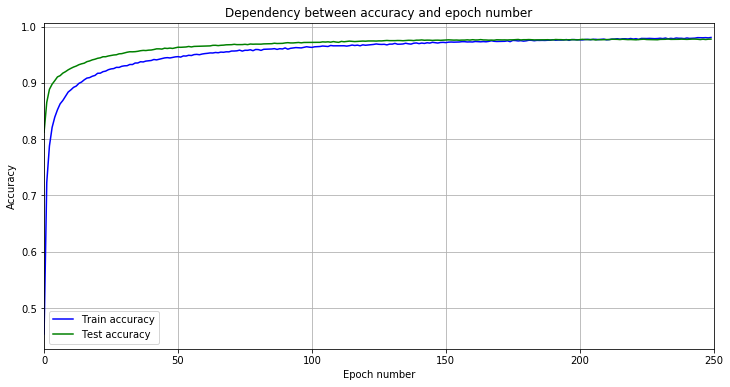

In [24]:
plt.figure(figsize=(12,6))
plt.plot(history.history['acc'], color = 'blue', label = 'Train accuracy')
plt.plot(history.history['val_acc'], color = 'green', label = 'Test accuracy')
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.xlim(0,250)
plt.title('Dependency between accuracy and epoch number')
plt.grid()
plt.legend()

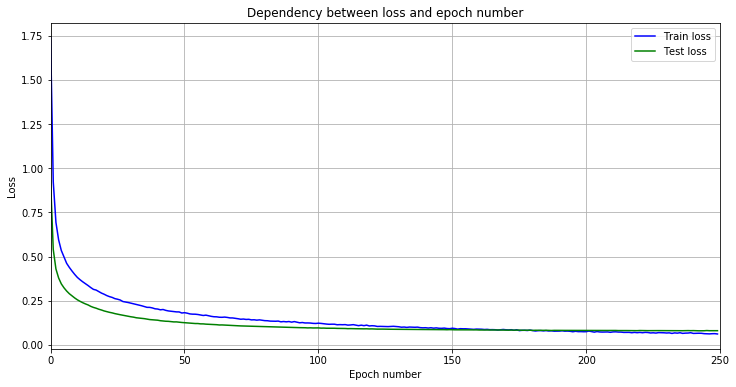

In [25]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], color = 'blue', label = 'Train loss')
plt.plot(history.history['val_loss'], color = 'green', label = 'Test loss')
plt.xlabel('Epoch number')
plt.xlim(0,250)
plt.ylabel('Loss')
plt.title('Dependency between loss and epoch number')
plt.grid()
plt.legend()

# Visualization

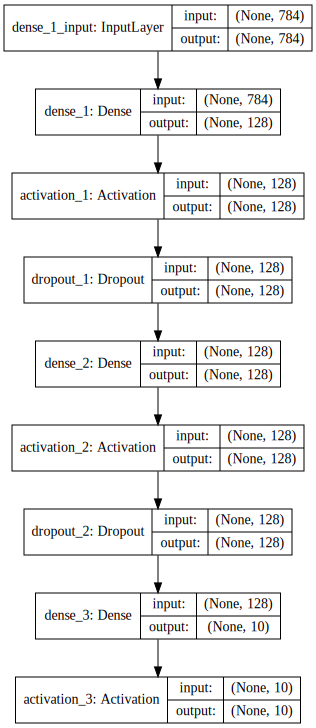

In [13]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

# Homework
For 20 epochs perform the following: 
1. Dependency between loss/accuracy and dropout rate
2. Dependency between score after evaluation of the model and dropout rate 

In [1]:
# Your code here